# Tarea 8

### Este codigo encuentra la raiz de una función usando el metodo de la bisección y el metodo de Newton

Importamos las librerias que vamos a ocupar.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

Definimos la interpolacion lineal tramo a tramo.

In [6]:
def find_ind(x, puntos):
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

def lin_interp(x, puntos):
    if x >= puntos[len(puntos)-1,0]:
        return puntos[len(puntos)-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    Lo = puntos[i][1]*(x - puntos[i+1][0])/(puntos[i][0] - puntos[i+1][0])
    L1 = puntos[i+1][1]*(x - puntos[i][0])/(puntos[i+1][0] - puntos[i][0])
    return Lo + L1

Definimos la función para calcular los coeficientes de la spline cubica vista en clases.

In [2]:
def spline_coefs(puntos):
    
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

Definimos la función de interpolacion de spline cubica vista en clases.

In [1]:
def spline_eval(x, coefs, puntos):

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

Definimos el rango donde se hara la interpolación de la spline cubica vista en clases y la función scipy, aplicamos ambas funciones y las graficamos junto a la función exacta.

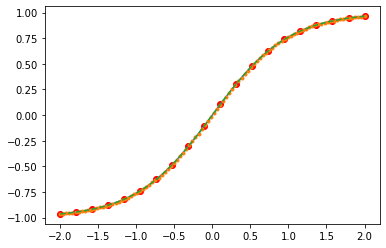

In [61]:
mini = -2  # Cota inferior de x
maxi = 2   # Cota superior de x
order = 20 # Cantidad de puntos a tomar

xp = np.linspace(mini, maxi, order) # Obtenemos los valores de x dentro del rango que elegimos
puntos = np.array([[xi, np.tanh(xi)] for xi in xp]) # Obtenemos los puntos en la función exacta para los x dentro del rango
coefs= spline_coefs(puntos) # Ocupamos los puntos obtenidos  para encontrar los coeficientes de la interpolación

y = np.tanh(xp) # Obtenemos los puntos en la función exacta para los x dentro del rango para la función de Scipy
f = interp1d(xp, y, kind='cubic') # Introduccimos los puntos obtenidos para hacer la interpolacioón con la función de Scipy


x = np.linspace(mini, maxi, 100) # Obtenemos 100 x dento del rango para graficar la funcion exacta y las dos interpolaciones
exact = np.tanh(x) # Obtenemos los puntos exactos
spline = [spline_eval(xi, coefs, puntos) for xi in x]# Obtenemos los puntos con la interpolacion de spline cubica vista en clase
scipy = f(x) # Obtenemos los puntos con la interpolación de la función de Scipy


plt.plot( x, exact, x, spline, '.', x, scipy, '--') # Graficamos la funcion exacta, la spline cubica y la función de Scipy
plt.scatter(puntos[:,0], puntos[:,1], color='red') # Graficamos los 20 puntos que se usaron para generar la interpolación

A primera vista no se ven diferencias claras en los resultados de las funciones, por lo que para ver mas claro las diferencia se calculan los errores relativos de ambas interpolaciones.

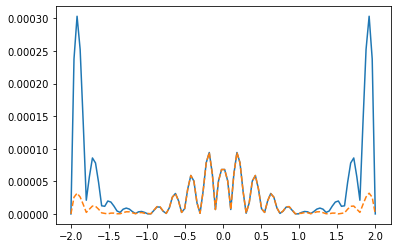

In [62]:
Error_SPL= abs((exact - spline)/exact) # Error relativo de la spline cubica vista en clases
Error_S= abs((exact - scipy)/exact) # Error relativo de la función de Scipy

plt.plot( x, Error_SPL, x, Error_S, '--') # Graficamos los errores vs x

A simple vista se logra ver que el error de la spline cubica es mayor al de la función de Scipy, por lo que calculamos cuanto error tienen en promedio cada una.

In [64]:
PromE_SPL= Error_SPL.mean() # Calculamos el promedio del error de  la spline cubica
PromE_S= Error_S.mean() # Calculamos el promedio del error de la función de Scipy
k = abs(PromE_SPL - PromE_S)
if PromE_SPL > PromE_S:
    print('El error relativo promedio al hacer interpolación con la spline cúbica introducida en clase es mayor al error',
         'de la función de scipy', 'con una diferencia entre los promedios de', str(k))
else :
    print('El error relativo promedio al hacer interpolación con la función de scipy es mayor al error',
         'de la spline cúbica introducida en clase' , 'con una diferencia entre los promedios de', str(k))

El error relativo promedio al hacer interpolación con la spline cúbica introducida en clase es mayor al error de la función de scipy con una diferencia entre los promedios de 2.362395319548436e-05
